# ML Experiment-2

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

Load and Observe Data

In [ ]:
df = pd.read_csv('User_Data.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,NaN,19,19000,No
1,15810944,M,35,20000,No
2,15668575,F,26,43000,No
3,15603246,F,27,57000,No
4,15804002,M,19,76000,No


In [ ]:
df.shape

(400, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           382 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    object
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary
count,4.000000e+02,400.000000,400.000000
mean,1.569154e+07,34.102500,69742.500000
std,7.165832e+04,15.221901,34096.960282
min,1.556669e+07,0.000000,15000.000000
25%,1.562676e+07,27.000000,43000.000000
50%,1.569434e+07,36.000000,70000.000000
75%,1.575036e+07,45.000000,88000.000000
max,1.581524e+07,60.000000,150000.000000


In [ ]:
df.nunique()

,0
User ID,400
Gender,6
Age,44
EstimatedSalary,117
Purchased,2


Clean and Preprocess the data

In [ ]:
df = df.drop(['User ID'], axis=1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,NaN,19,19000,No
1,M,35,20000,No
2,F,26,43000,No
3,F,27,57000,No
4,M,19,76000,No


In [ ]:
df['Gender'].unique()

array([nan, 'M', 'F', '@', '#', '%', '$'], dtype=object)

In [ ]:
df['Gender'] = df['Gender'].replace(['@', '#', '%', '$'], pd.NA)

In [ ]:
gender_counts = df['Gender'].value_counts(normalize=True)
df['Gender'] = df['Gender'].apply(lambda x: np.random.choice(gender_counts.index, p=gender_counts.values) if pd.isna(x) else x)
print(df)

    Gender  Age  EstimatedSalary Purchased
0        M   19            19000        No
1        M   35            20000        No
2        F   26            43000        No
3        F   27            57000        No
4        M   19            76000        No
..     ...  ...              ...       ...
395      F   46            41000       Yes
396      M   51            23000       Yes
397      M   50            20000       Yes
398      M   36            33000        No
399      M   49            36000       Yes

[400 rows x 4 columns]


In [ ]:
df['Gender'].value_counts()

,count
Gender,
F,206
M,194


In [ ]:
df['Age'].unique()

array([19, 35, 26, 27, 32, 25, 20, 18,  0, 47, 45, 46, 48, 49, 29, 31, 21,
       28, 33, 30, 23, 24, 59, 22, 34, 39, 38, 37, 42, 36, 40, 41, 58, 55,
       52, 60, 56, 53, 50, 51, 57, 43, 54, 44])

In [ ]:
df['Age'].value_counts()

,count
Age,
0,40
35,30
37,18
42,16
26,15
40,14
48,13
39,13
41,13


In [ ]:
# Using median because distribution is skewed (i.e. the concentration of distribution is more to left)
df['Age'] = df['Age'].replace([0], df['Age'].median())
df['Age'].value_counts()

,count
Age,
36,50
35,30
37,18
42,16
26,15
40,14
47,13
48,13
41,13


Preprocess the target variable *('Purchased' & 'Gender' column)*

In [ ]:
purchased_values = df['Purchased'].unique()
print(purchased_values)

['No' 'Yes']


In [ ]:
df['Purchased'] = df['Purchased'].map({'No':0, 'Yes':1})
df.tail()

,Gender,Age,EstimatedSalary,Purchased
395,F,46,41000,1
396,M,51,23000,1
397,M,50,20000,1
398,M,36,33000,0
399,M,49,36000,1


In [ ]:
df['Purchased'].value_counts()

,count
Purchased,
0,257
1,143


In [ ]:
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [ ]:
df['Gender'].value_counts()

,count
Gender,
0,206
1,194


Count Plot & Visualizations

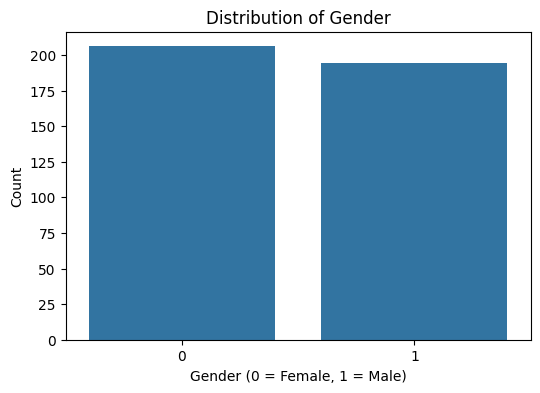

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title("Distribution of Gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()

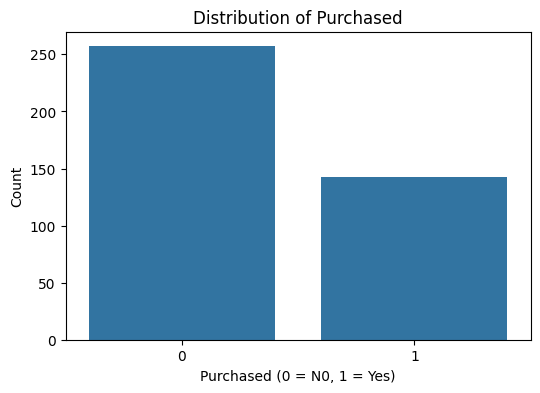

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Purchased', data=df)
plt.title("Distribution of Purchased")
plt.xlabel("Purchased (0 = N0, 1 = Yes)")
plt.ylabel("Count")
plt.show()

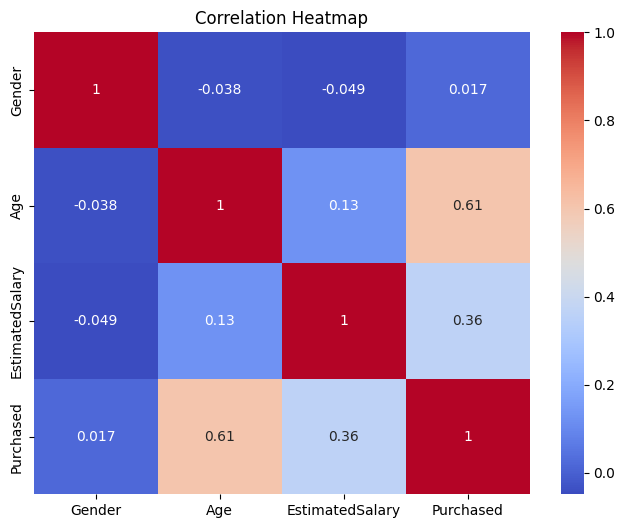

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Use standardization

In [ ]:
age_mean = df['Age'].mean()
age_std = df['Age'].std()
salary_mean = df['EstimatedSalary'].mean()
salary_std = df['EstimatedSalary'].std()

df['Age'] = (df['Age'] - age_mean) / age_std
df['EstimatedSalary'] = (df['EstimatedSalary'] - salary_mean) / salary_std

df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,-1.847435,-1.488183,0
1,1,-0.266953,-1.458854,0
2,0,-1.155974,-0.784307,0
3,0,-1.057194,-0.373714,0
4,1,-1.847435,0.183521,0


Initialization of parameters

In [ ]:
X = df.drop(['Purchased'],axis=1)
Y = df['Purchased']

In [ ]:
w = np.zeros((X.shape[1], 1))
b = 0

Functions

In [ ]:
# sigmoid function
def sigmoid(z):
    return 1 /(1 + np.exp(-z))

In [ ]:
# Cost function
def calc_cost(Y, y_pred):
    m = Y.shape[0]
    cost = - (1/m) * np.sum(Y * np.log(y_pred + 1e-4) + (1 - Y) * np.log(1 - y_pred + 1e-4))
    return cost

In [ ]:
# Gradient Descent
def gradient_descent(X, Y, w, b, learning_rate, epochs):
    m = X.shape[0]
    costs = []

    for i in range(epochs):
        # Linear function
        z = np.dot(X, w) + b
        y_pred = sigmoid(z)

        # Compute cost
        cost = calc_cost(Y, y_pred)

        # Gradients
        dw = (1/m) * np.dot(X.T, (y_pred - Y))
        db = (1/m) * np.sum(y_pred - Y)

        # Update parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 100 == 0:
            costs.append(cost)
            print(f"Epoch {i}, Cost: {cost}")

    return w, b, costs

In [ ]:
w, b, costs = gradient_descent(X.values, Y.values.reshape(-1, 1), w, b, learning_rate=0.1, epochs=1000)

print("Final weights:\n", w)
print("Final bias:", b)

Epoch 0, Cost: 0.6929472005572793
Epoch 100, Cost: 0.39344757802564234
Epoch 200, Cost: 0.3666094134384633
Epoch 300, Cost: 0.35764481918532137
Epoch 400, Cost: 0.3534525658598913
Epoch 500, Cost: 0.35116047474248374
Epoch 600, Cost: 0.34979298754121213
Epoch 700, Cost: 0.348932380761426
Epoch 800, Cost: 0.3483716757109929
Epoch 900, Cost: 0.3479976670570518
Final weights:
 [[0.40254338]
 [2.37280493]
 [1.24825473]]
Final bias: -1.2611901528029386


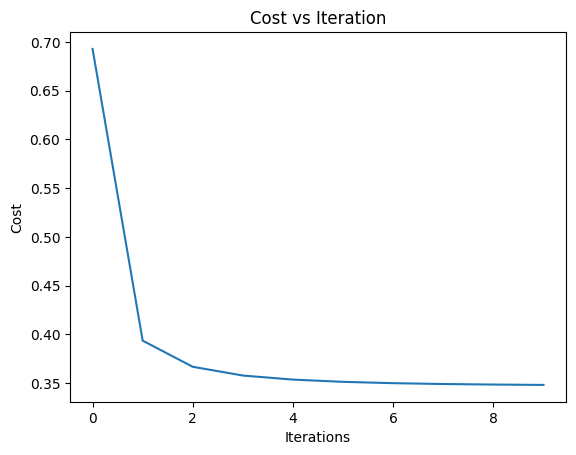

In [ ]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iteration')
plt.show()

Make Prediction

In [ ]:
# Prediction function
def predict(X, w, b):
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    y_pred = (y_pred >= 0.5).astype(int)
    return y_pred

# Make predictions on the training data
y_pred_train = predict(X.values, w, b)

# Display the predictions
print("Predictions on training data:\n", y_pred_train.tolist())

Predictions on training data:
 [[0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]

In [ ]:
def calculate_accuracy(y_true, y_pred):
    correct_predictions = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct_predictions += 1
    accuracy = correct_predictions / len(y_true)
    return accuracy

Y_reshaped = Y.values.reshape(-1, 1)

accuracy_train = calculate_accuracy(Y_reshaped, y_pred_train)
print(f"Accuracy on training data: {accuracy_train:.4f}")

test_loss = calc_cost(Y_reshaped, y_pred_train)
print(f"Test Loss: {test_loss:.4f}")

Accuracy on training data: 0.8600
Test Loss: 1.2894


Use libraries to model Logistic regression and make prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and fit model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred_sklearn_train = model.predict(X_train)
y_pred_sklearn_test = model.predict(X_test)

# Accuracy and Loss for training data
print("Sklearn Train Accuracy:", accuracy_score(y_train, y_pred_sklearn_train))
print("Sklearn Train Loss:", log_loss(y_train, y_pred_sklearn_train))

# Accuracy and Loss for test data
print("Sklearn Test Accuracy:", accuracy_score(y_test, y_pred_sklearn_test))
print("Sklearn Test Loss:", log_loss(y_test, y_pred_sklearn_test))

print("w = ", model.coef_)
print("b = ", model.intercept_)

Sklearn Train Accuracy: 0.8375
Sklearn Train Loss: 5.857093675731537
Sklearn Test Accuracy: 0.8875
Sklearn Test Loss: 4.054911006275679
w =  [[0.45220555 2.0936811  1.21173225]]
b =  [-1.27582447]
